# Heart Disease Prediction using Machine Learning Approach

Heart Disease (including Coronary Heart Disease, Hypertension, and Stroke) remains the No. 1 cause of death in the US.The Heart Disease and Stroke Statistics—2019 Update from the American Heart Association indicates that:

- 116.4 million, or 46% of US adults are estimated to have hypertension. These are findings related to the new 2017 Hypertension Clinical Practice Guidelines.
- On average, someone dies of CVD every 38 seconds. About 2,303 deaths from CVD each day, based on 2016 data.
- On average, someone dies of a stroke every 3.70 minutes. About 389.4 deaths from stroke each day, based on 2016 data.


In this notebook i will try to unleash useful insights using this heart disease datasets and by building stacked ensemble model by combining the power of best performing machine learning algorithms.

Table of Content of this notebook:
1. Data description
2. Importing Libraries & setting up environment
3. Loading dataset
4. Data Cleaning & Preprocessing
5. Exploratory Data Analysis
6. OUtlier Detection & Removal
7. Training & Test Split
8. Cross Validation
9. Model Building
10. Model evaluation & comparison
11. Feature Selection
12. Model Evaluation
13. Conclusion

## 1. Dataset description

This dataset consists of 11 features and a target variable. It has 6 nominal variables and 5 numeric variables. The detailed description of all the features are as follows:

1. Age: Patients Age in years (Numeric)
2. Sex: Gender of patient (Male - 1, Female - 0) (Nominal)
3. Chest Pain Type: Type of chest pain experienced by patient categorized into 1 typical, 2 typical angina, 3 non- anginal pain, 4 asymptomatic (Nominal)
4. resting bp s: Level of blood pressure at resting mode in mm/HG (Numerical)
5. cholestrol: Serum cholestrol in mg/dl (Numeric)
6. fasting blood sugar: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
7. resting ecg: Result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy (Nominal)
8. max heart rate: Maximum heart rate achieved (Numeric)
9. exercise angina: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
10. oldpeak: Exercise induced ST-depression in comparison with the state of rest (Numeric)
11. ST slope: ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping (Nominal)

### Target variable

12. target: It is the target variable which we have to predict 1 means patient is suffering from heart risk and 0 means patient is normal.

## 2. Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb

from scipy import stats

## Loading Dataset

In [2]:
dt = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [3]:
dt.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


## Data Cleaning & Preprocessing

In [4]:
# renaming features to proper name
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [5]:
# converting features to categorical features 

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'



dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'



dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt["sex"] = dt.sex.apply(lambda  x:'male' if x==1 else 'female')

In [6]:
dt['chest_pain_type'].value_counts()

chest_pain_type
asymptomatic        625
non-anginal pain    283
atypical angina     216
typical angina       66
Name: count, dtype: int64

In [7]:
dt['rest_ecg'].value_counts()

rest_ecg
normal                          684
left ventricular hypertrophy    325
ST-T wave abnormality           181
Name: count, dtype: int64

In [8]:
dt['st_slope'].value_counts()

st_slope
flat           582
upsloping      526
downsloping     81
0                1
Name: count, dtype: int64

In [9]:
#dropping row with st_slope =0
dt.drop(dt[dt.st_slope == 0].index, inplace = True)

In [10]:
#checking distribution
dt['st_slope'].value_counts()

st_slope
flat           582
upsloping      526
downsloping     81
Name: count, dtype: int64

In [11]:
# checking the top 5 entries of dataset after feature encoding
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0


As we can see features are encoded sucessfully to their respective categories. Next we will be checking if there is any missing entry or not ?

In [12]:
# Checking missing entries in the dataset columnwise
dt.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

So, there are no missing entries in the dataset thats great. Next we will move towards exploring the dataset by performing detailed EDA

## Exploratory Data Analysis (EDA)

In [13]:
# checking the shape of the processed dataset
dt.shape

(1189, 12)

So, there are total 1189 records and 11 features with 1 target variable. Lets check the summary of numerical and categorical features.

In [14]:
# extract summary statistics of the numerical values
dt.describe(include = [np.number])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549,0.528175
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


As we can see from above description **resting_blood_pressure** and **cholestrol** have some outliers as they have minimum value of 0 whereas cholestrol has outlier on upper side also having maximum value of 603.

In [15]:
# summary statistics of categorical columns
dt.describe(include =[object])

,sex,chest_pain_type,rest_ecg,st_slope
count,1189,1189,1189,1189
unique,2,4,3,3
top,male,asymptomatic,normal,flat
freq,908,625,683,582


### Distribution of Heart disease (target variable)

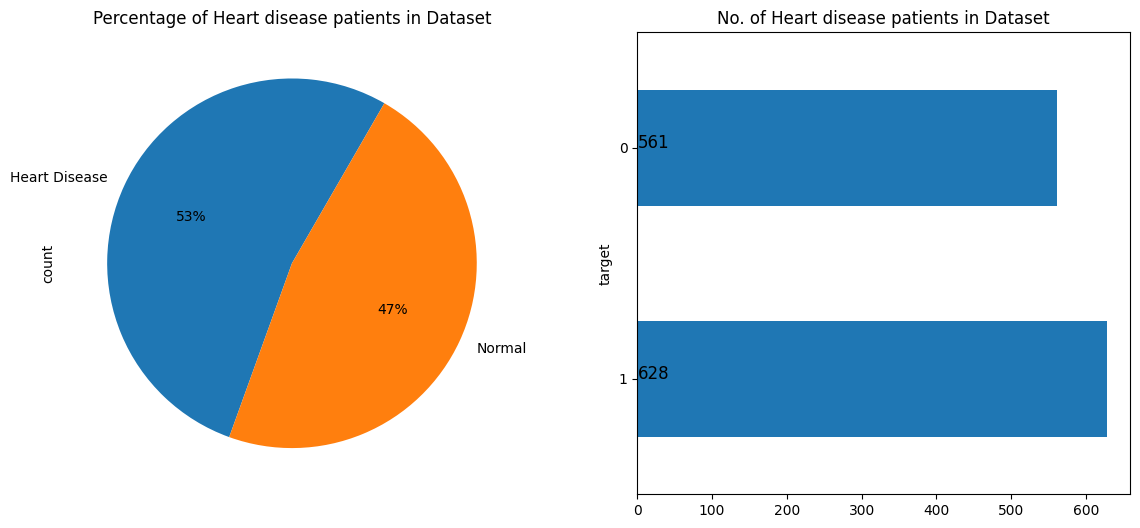

In [16]:
# Plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = dt['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = dt["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(dt["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

The dataset is balanced having *628 heart disease* patients and *561 normal patients*.

### Checking Gender & Agewise Distribution

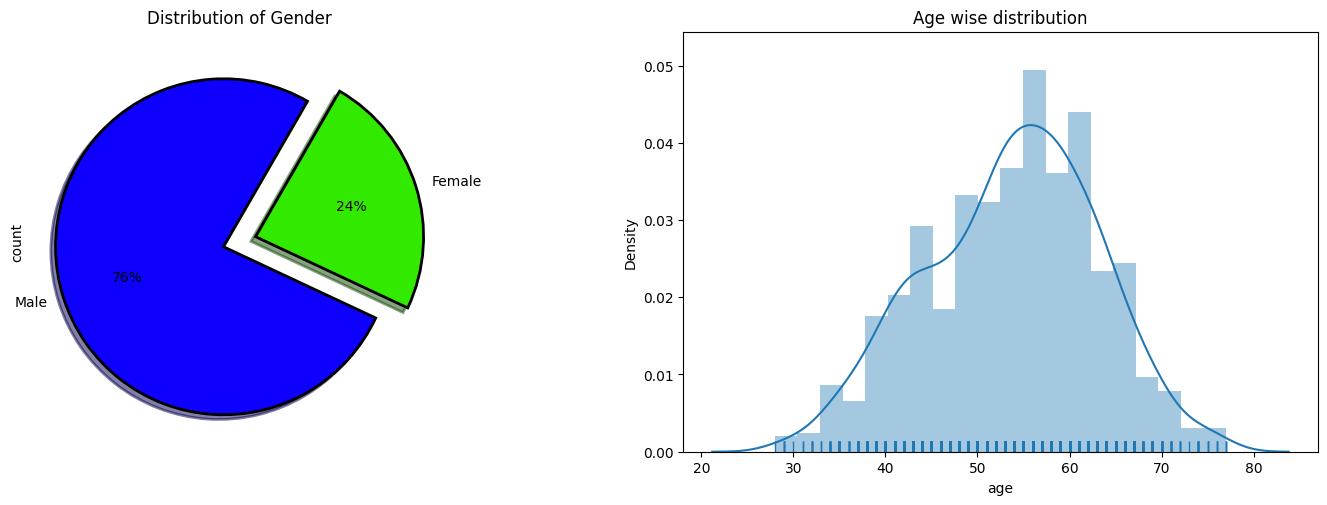

In [17]:
plt.figure(figsize=(18,12))

# Distribution of Gender
plt.subplot(221)
dt["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1], shadow =True)
plt.title("Distribution of Gender")

# Age wise distribution
plt.subplot(222)
ax= sns.distplot(dt['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

As we can see from above plot, in this dataset males percentage is way too higher than females.
And average age of patients is around 55.

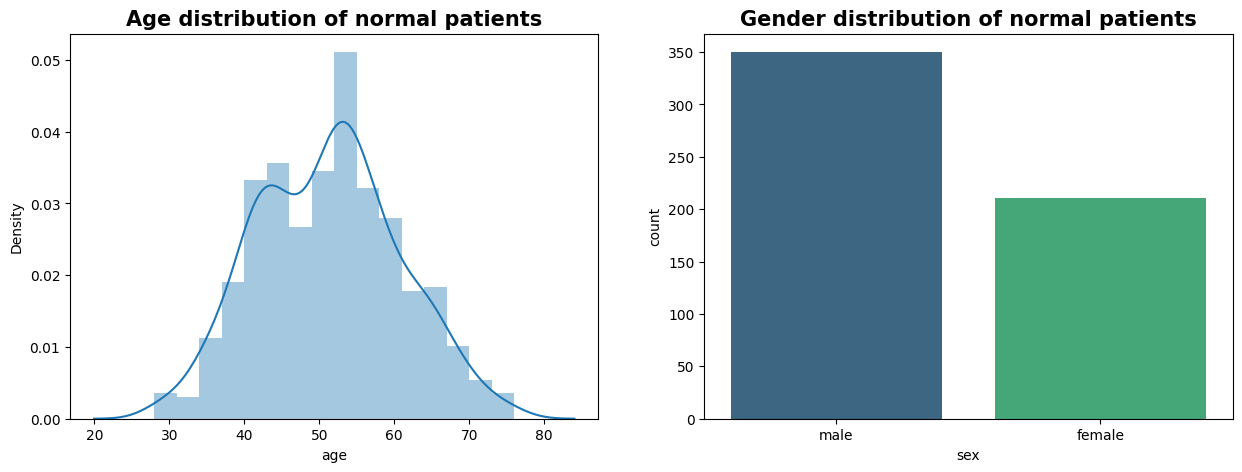

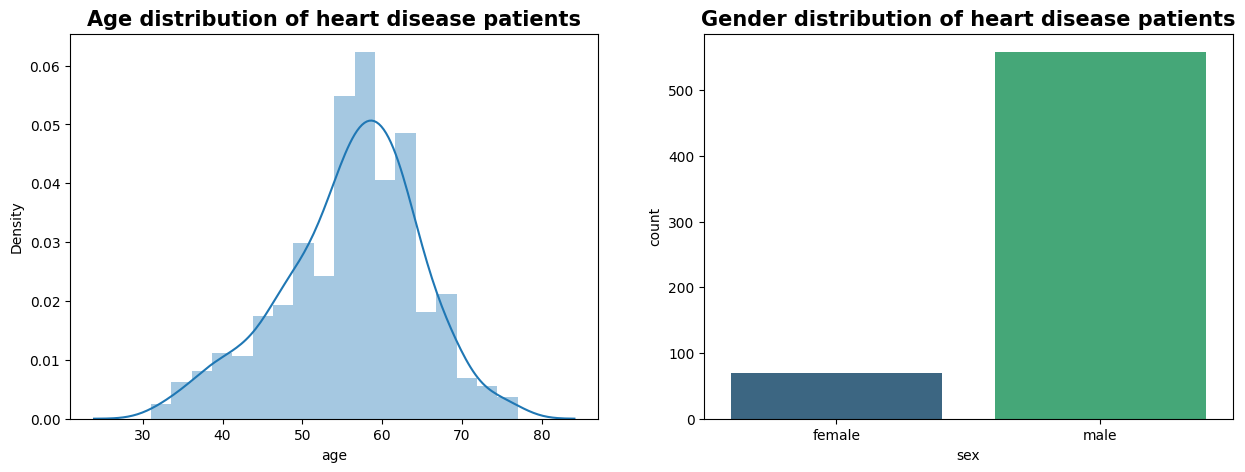

In [18]:
# creating separate df for normal and heart patients

attr_1=dt[dt['target']==1]

attr_0=dt[dt['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('Age distribution of normal patients', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(data=attr_0['sex'],x=attr_0['sex'], palette='viridis')
plt.title('Gender distribution of normal patients', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('Age distribution of heart disease patients', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(data=attr_1['sex'],x=attr_1['sex'], palette='viridis')
plt.title('Gender distribution of heart disease patients', fontsize=15, weight='bold' )
plt.show()

As we can see from above plot more patients accounts for heart disease in comparison to females whereas mean age for heart disease patients is around 58 to 60 years.

### Distribution of Chest Pain Type

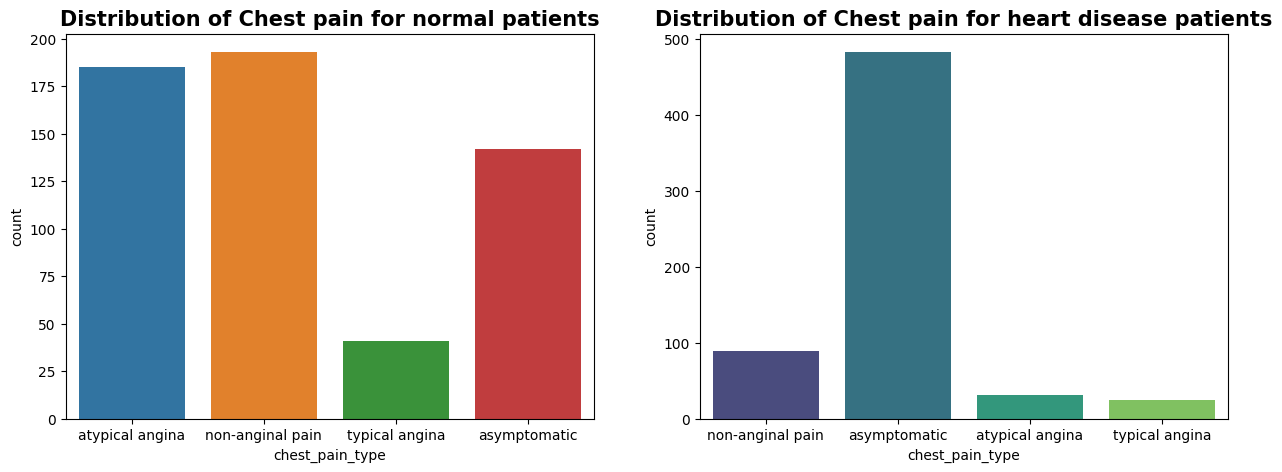

In [19]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(data=attr_0['chest_pain_type'], x=attr_0['chest_pain_type'])
plt.title('Distribution of Chest pain for normal patients', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(data=attr_1['chest_pain_type'], x=attr_1['chest_pain_type'], palette='viridis')
plt.title('Distribution of Chest pain for heart disease patients', fontsize=15, weight='bold' )
plt.show()


In [20]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
chest_pain_type,,
asymptomatic,25.310000,76.910000
atypical angina,32.980000,4.940000
non-anginal pain,34.400000,14.170000
typical angina,7.310000,3.980000


As we can see from above plot 76% of the chest pain type of the heart disease patients have asymptomatic chest pain.

Asymptomatic heart attacks medically known as silent myocardial infarction (SMI) annually accounts for around 45-50% of morbidities due to cardiac ailments and even premature deaths in India. The incidences among middle aged people experiencing SMI is twice likely to develop in males than females. The symptoms of SMI being very mild in comparison to an actual heart attack; it is described as a silent killer. Unlike the symptoms in a normal heart attack which includes extreme chest pain, stabbing pain in the arms, neck & jaw, sudden shortness of breath, sweating and dizziness, the symptoms of SMI are very brief and hence confused with regular discomfort and most often ignored. [reference](https://www.maxhealthcare.in/blogs/rise-cases-asymptomatic-heart-attacks-amongst-middle-aged-people)

### Distribution of Rest ECG

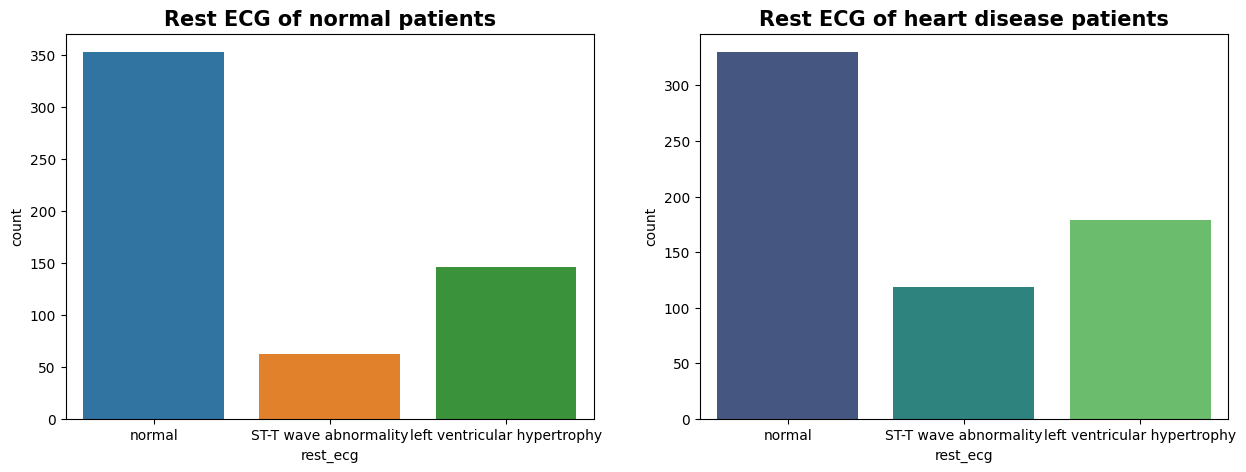

In [21]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(data=attr_0['rest_ecg'], x=attr_0['rest_ecg'])
plt.title('Rest ECG of normal patients', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(data=attr_1['rest_ecg'], x=attr_1['rest_ecg'], palette='viridis')
plt.title('Rest ECG of heart disease patients', fontsize=15, weight='bold' )
plt.show()

In [22]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['rest_ecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
rest_ecg,,
ST-T wave abnormality,11.050000,18.950000
left ventricular hypertrophy,26.020000,28.500000
normal,62.920000,52.550000


An electrocardiogram records the electrical signals in your heart. It's a common test used to detect heart problems and monitor the heart's status in many situations. Electrocardiograms — also called ECGs or EKGs. but ECG has limits. It measures heart rate and rhythm—but it doesn’t necessarily show blockages in the arteries.Thats why in this dataset around 52% heart disease patients have normal ECG.

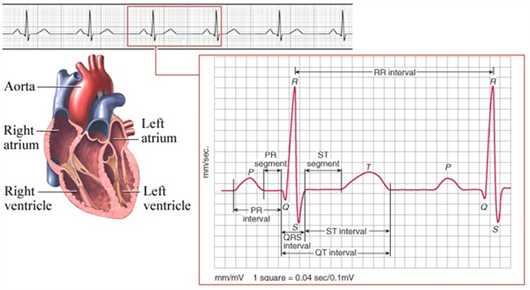

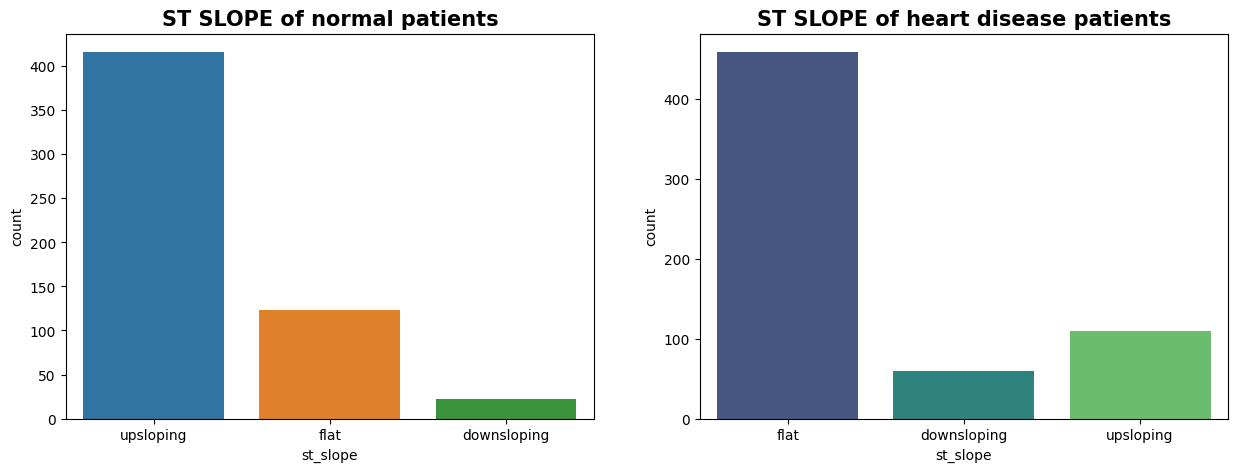

In [23]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(data=attr_0['st_slope'], x=attr_0['st_slope'])
plt.title('ST SLOPE of normal patients', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(data=attr_1['st_slope'], x=attr_1['st_slope'], palette='viridis')
plt.title('ST SLOPE of heart disease patients', fontsize=15, weight='bold' )
plt.show()

In [24]:
#Exploring the Heart Disease patients based on ST Slope
plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
st_slope,,
downsloping,3.920000,9.390000
flat,21.930000,73.090000
upsloping,74.150000,17.520000


The ST segment /heart rate slope (ST/HR slope), has been proposed as a more accurate ECG criterion for diagnosing significant coronary artery disease (CAD) in most of the research papers.

As we can see from above plot upsloping is positive sign as 74% of the normal patients have upslope where as 72.97% heart patients have flat sloping.

### Distribution of Numerical features

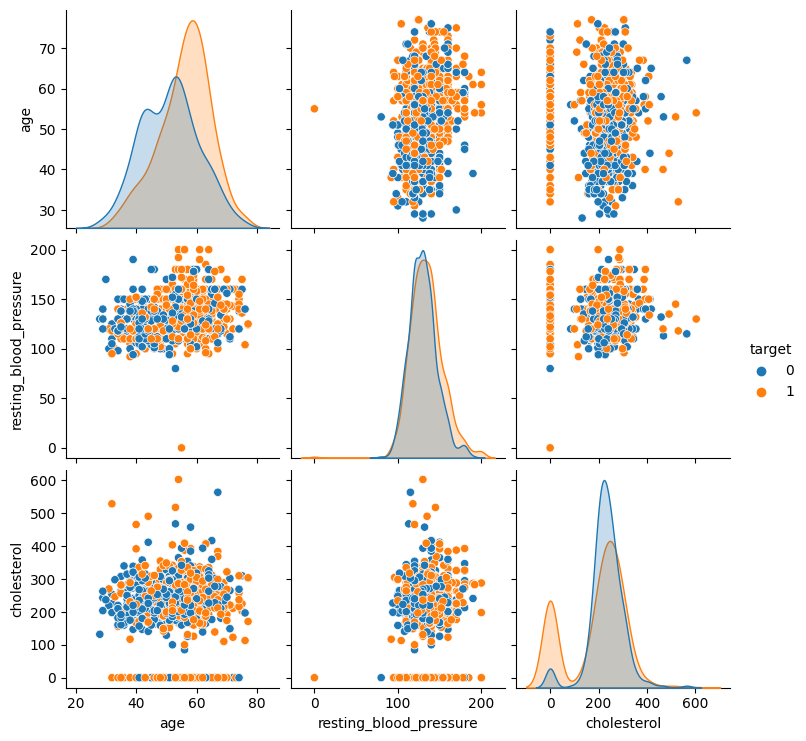

In [25]:
sns.pairplot(dt, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'] )

From the above plot it is clear that as the age increases chances of heart disease increases

<Axes: xlabel='resting_blood_pressure', ylabel='cholesterol'>

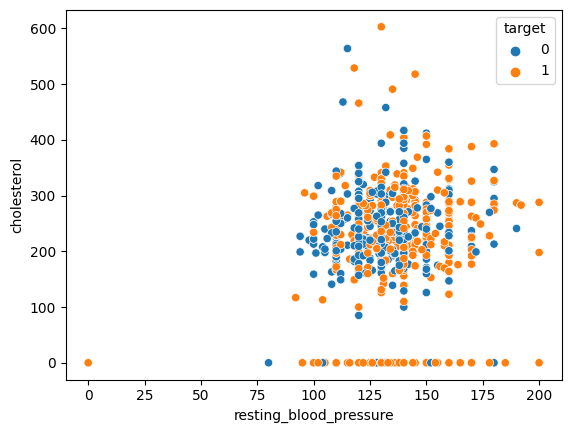

In [26]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'cholesterol', hue = 'target', data = dt)

From the above plot we can see outliers clearly as for some of the patients cholestrol is 0 whereas for one patient both cholestrol and resting bp is 0 which is may be due to missing entries we will filter these ouliers later.

<Axes: xlabel='resting_blood_pressure', ylabel='age'>

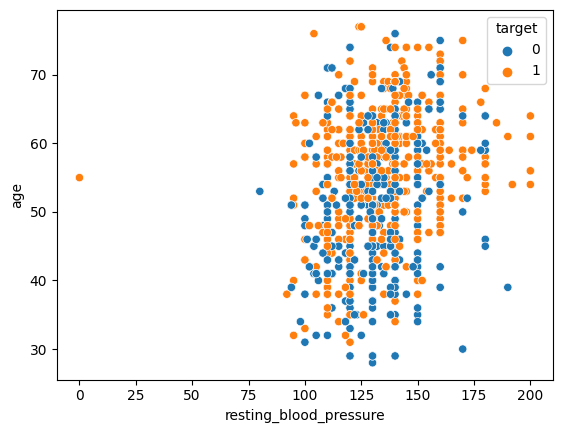

In [27]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = dt)

## Outlier Detection & Removal

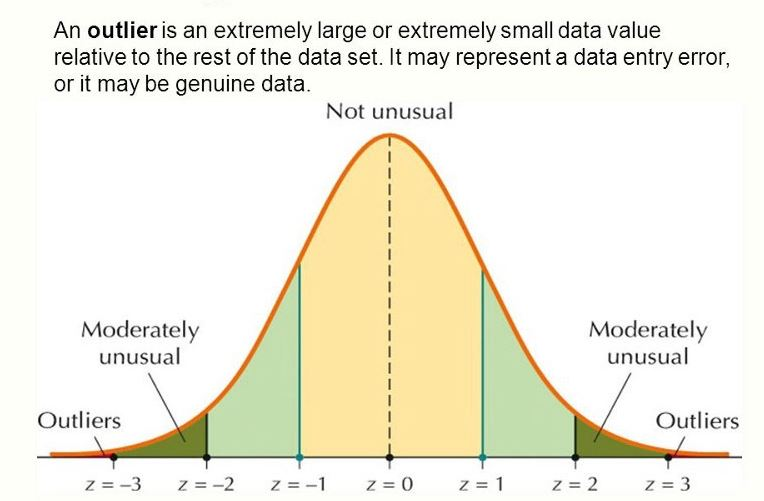

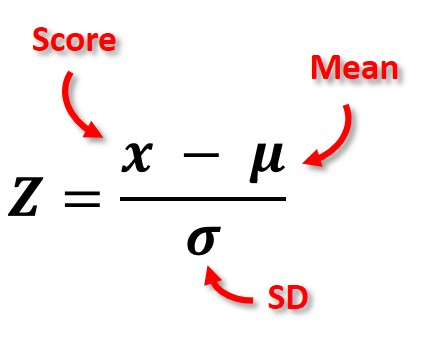

In [28]:
# filtering numeric features as age , resting bp, cholestrol and max heart rate achieved has outliers as per EDA
dt_numeric = dt[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]

In [29]:
dt_numeric.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [30]:
# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(dt_numeric))
print(z)

           age  resting_blood_pressure  cholesterol  max_heart_rate_achieved
0     1.466266                0.428136     0.775228                 1.264301
1     0.503599                1.517370     0.299516                 0.637259
2     1.787155                0.116481     0.716067                 1.635766
3     0.610562                0.319212     0.035725                 1.243865
4     0.031216                0.972753     0.151616                 0.695204
...        ...                     ...          ...                      ...
1185  0.931451                1.205715     0.528727                 0.303303
1186  1.528698                0.645983     0.171336                 0.049408
1187  0.352105                0.116481     0.782658                 0.969535
1188  0.352105                0.116481     0.252646                 1.342681
1189  1.680192                0.319212     0.348816                 1.303491

[1189 rows x 4 columns]


In [31]:
# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  592,
        617,  733,  760, 1012, 1038, 1074]), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1]))


Don’t be confused by the results. The first array contains the list of row numbers and second array respective column numbers, which mean z[30][2] have a Z-score higher than 3. There are total 17 data points which are outliers.

In [32]:
#filtering outliers retaining only those data points which are below threshhold
dt = dt[(z < 3).all(axis=1)]

In [33]:
# checking shape of dataset after outlier removal
dt.shape

(1172, 12)

Great !! all the 17 data points which are outliers are now removed.

Now before splitting dataset into train and test we first encode categorical variables as dummy variables and segregate feature and target variable.

In [34]:
## encoding categorical variables
dt = pd.get_dummies(dt, drop_first=True)

dt.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
0,40,140,289,0,172,0,0.0,0,True,True,False,False,False,True,False,True
1,49,160,180,0,156,0,1.0,1,False,False,True,False,False,True,True,False
2,37,130,283,0,98,0,0.0,0,True,True,False,False,False,False,False,True
3,48,138,214,0,108,1,1.5,1,False,False,False,False,False,True,True,False
4,54,150,195,0,122,0,0.0,0,True,False,True,False,False,True,False,True


In [35]:
# checking the shape of dataset
dt.shape

(1172, 16)

In [36]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['target'],axis=1)
y = dt['target']

### Checking Correlation

<Axes: title={'center': 'Correlation with Diabetes'}>

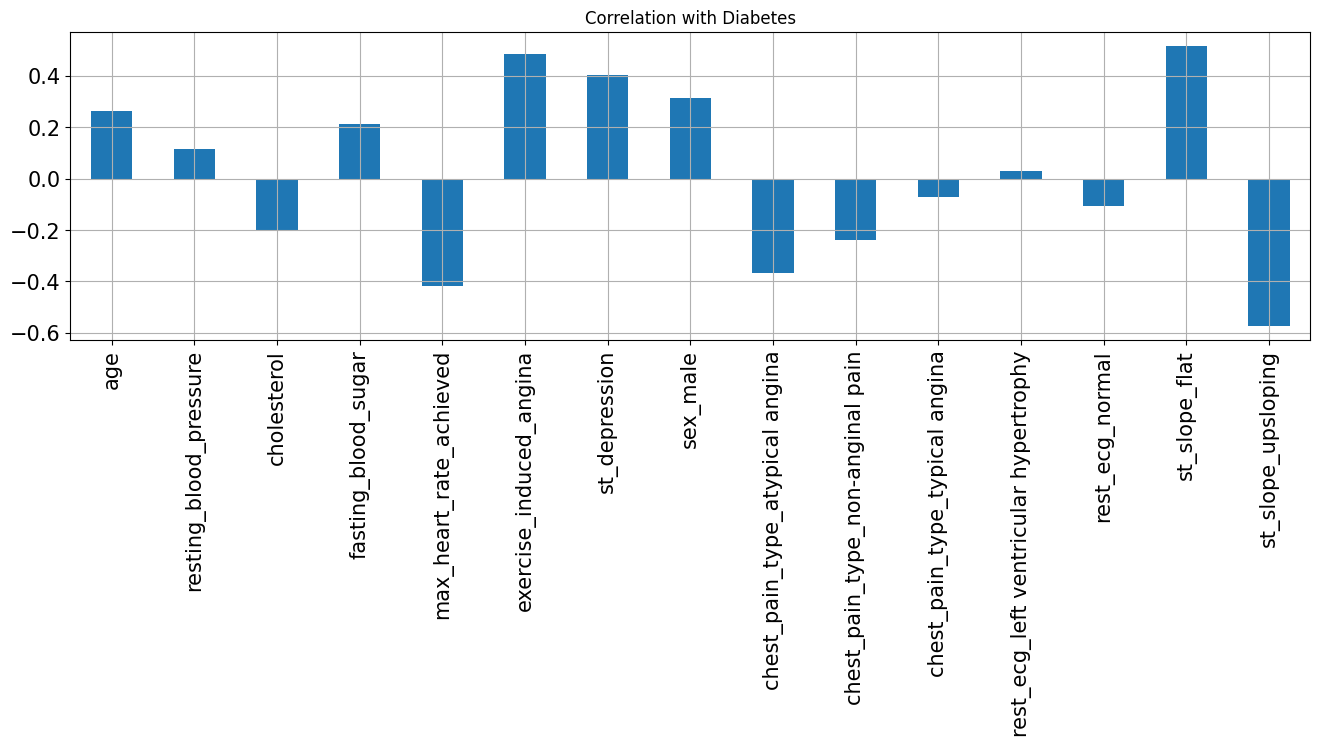

In [37]:
#Correlation with Response Variable class

X.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)

## 7. Train Test Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [39]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
target
1    491
0    446
Name: count, dtype: int64
Distribution of traget variable in test set
target
1    123
0    112
Name: count, dtype: int64


In [40]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(937, 15)
(937,)
------------Test Set------------------
(235, 15)
(235,)


### Feature Normalization

In this step we will normalize all the numeric feature in the range of 0 to 1

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
478,0.673469,0.193548,0.000000,1,0.303704,1,0.454545,True,False,False,False,False,True,False,False
253,0.673469,0.354839,0.594705,0,0.355556,1,0.194805,True,False,False,False,False,False,False,True
273,0.551020,0.516129,0.409369,0,0.466667,1,0.584416,True,False,False,False,False,True,True,False
111,0.591837,0.623656,0.519348,0,0.185185,1,0.584416,True,False,False,False,False,True,True,False
50,0.448980,0.408602,0.474542,0,0.400000,1,0.454545,True,False,False,False,False,True,True,False


In [42]:
X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
1024,0.693878,0.301075,0.572301,0,0.266667,0,0.376623,True,True,False,False,True,False,True,False
182,0.469388,0.408602,0.456212,0,0.614815,0,0.194805,True,True,False,False,False,True,False,True
785,0.346939,0.494624,0.480652,0,0.629630,1,0.220779,False,False,False,False,True,False,True,False
924,0.591837,0.623656,0.562118,0,0.333333,1,0.272727,True,False,False,False,True,False,True,False
780,0.612245,0.387097,0.527495,0,0.466667,1,0.584416,True,False,False,False,True,False,True,False


## 8. Cross Validation

In this step, we will build different baseline models and perform 10-fold cross validation to filter top performing baseline models to be used in level 0 of stacked ensemble method.

In [43]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost as xgb
# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000)))
    basedModels.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500)))
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100)))
    basedModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000)))
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    
    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [44]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

LR_L2: 0.850526 (0.033387)
LDA: 0.851601 (0.035456)
KNN7: 0.850538 (0.031620)
KNN5: 0.846225 (0.038378)
KNN9: 0.851601 (0.039419)
KNN11: 0.851613 (0.033054)
CART: 0.870899 (0.019808)
NB: 0.847335 (0.034676)
SVM Linear: 0.848421 (0.039710)
SVM RBF: 0.851624 (0.042915)
AB: 0.857984 (0.038486)
GBM: 0.885736 (0.031903)
RF_Ent100: 0.927351 (0.023618)
RF_Gini100: 0.930554 (0.023298)
ET100: 0.922020 (0.029688)
ET500: 0.925212 (0.036846)
MLP: 0.870819 (0.039083)
SGD3000: 0.844178 (0.028795)
XGB_2000: 0.924148 (0.023386)
XGB_500: 0.927362 (0.023969)
XGB_100: 0.927362 (0.024436)
XGB_1000: 0.923084 (0.024016)
ET1000: 0.925223 (0.030754)


## 9. Model building

### Random Forest Classifier (criterion = 'entropy')

In [45]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

### Multi Layer Perceptron

In [46]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

### K nearest neighbour (n=9)

In [47]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

### Extra Tree Classifier (n_estimators=500)

In [48]:
et_100 = ExtraTreesClassifier(n_estimators= 100)
et_100.fit(X_train,y_train)
y_pred_et_100 = et_100.predict(X_test)

### XGBoost (n_estimators=500)

In [49]:
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators= 500)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

### Support Vector Classifier (kernel='linear')

In [50]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

### Stochastic Gradient Descent

In [51]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

### Adaboost Classifier

In [52]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

### Decision Tree Classifier (CART)

In [53]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

### Gradient Boosting Machine

In [54]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

## 10. Model Evaluation

In this step we will first define which evaluation metrics we will use to evaluate our model. The most important evaluation metric for this problem domain is **sensitivity, specificity, Precision, F1-measure, Geometric mean and mathew correlation coefficient (MCC) and finally ROC AUC curve.**

### Mathew Correlation coefficient (MCC)

The Matthews correlation coefficient (MCC), instead, is a more reliable statistical rate which produces a high score only if the prediction obtained good results in all of the four confusion matrix categories (true positives, false negatives, true negatives, and false positives), proportionally both to the size of positive elements and the size of negative elements in the dataset.

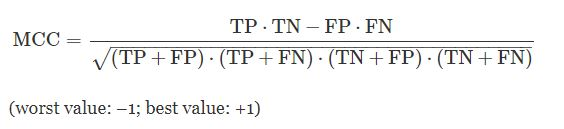

### Log Loss

Logarithmic loss measures the performance of a classification model where the prediction input is a probability value between 0 and 1. The goal of our machine learning models is to minimize this value. A perfect model would have a log loss of 0. Log loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high log loss.

The graph below shows the range of possible log loss values given a true observation (isDog = 1). As the predicted probability approaches 1, log loss slowly decreases. As the predicted probability decreases, however, the log loss increases rapidly. Log loss penalizes both types of errors, but especially those predications that are confident and wrong!

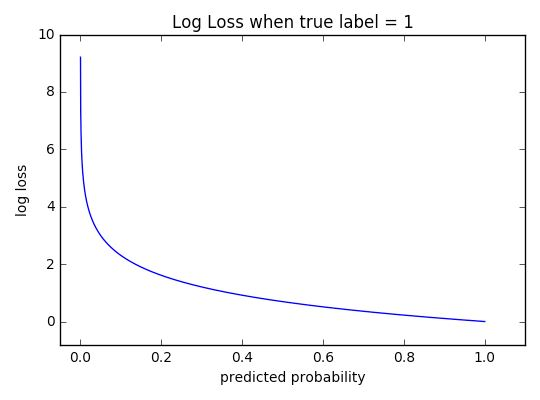

### F1 Score

F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.

**F1 Score = 2(Recall Precision) / (Recall + Precision)**

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.897872,0.861314,0.95935,0.830357,0.907692,0.894853,3.681054,0.799934


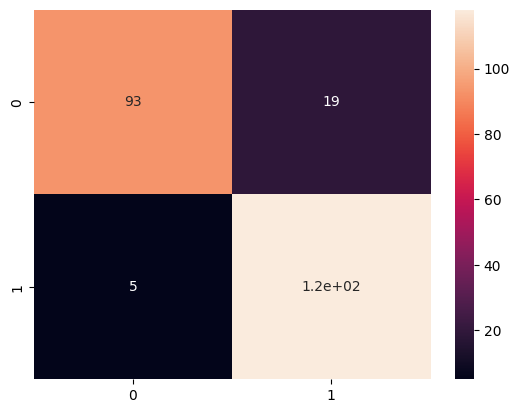

In [55]:
CM=confusion_matrix(y_test,y_pred_rfe)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_rfe)
acc= accuracy_score(y_test, y_pred_rfe)
roc=roc_auc_score(y_test, y_pred_rfe)
prec = precision_score(y_test, y_pred_rfe)
rec = recall_score(y_test, y_pred_rfe)
f1 = f1_score(y_test, y_pred_rfe)

mathew = matthews_corrcoef(y_test, y_pred_rfe)
model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [56]:
data = {        'MLP': y_pred_mlp, 
                'KNN': y_pred_knn, 
                'EXtra tree classifier': y_pred_et_100,
                'XGB': y_pred_xgb, 
                'SVC': y_pred_svc, 
                'SGD': y_pred_sgd,
                'Adaboost': y_pred_ada, 
                'CART': y_pred_decc, 
                'GBM': y_pred_gbm }

models = pd.DataFrame(data)
all_res = []
all_res.append(model_results)
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    all_res.append(results)
    # model_results = model_results.append(results, ignore_index = True)

model_results = pd.concat(all_res, ignore_index = True)
model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.897872,0.861314,0.959350,0.830357,0.907692,0.894853,3.681054,0.799934
1,MLP,0.825532,0.797101,0.894309,0.750000,0.842912,0.822154,6.288467,0.653628
2,KNN,0.808511,0.786765,0.869919,0.741071,0.826255,0.805495,6.901976,0.618029
3,EXtra tree classifier,0.897872,0.872180,0.943089,0.848214,0.906250,0.895652,3.681054,0.797405
4,XGB,0.906383,0.879699,0.951220,0.857143,0.914062,0.904181,3.374299,0.814595
5,SVC,0.825532,0.801471,0.886179,0.758929,0.841699,0.822554,6.288467,0.652539
6,SGD,0.812766,0.772414,0.910569,0.705357,0.835821,0.807963,6.748599,0.632827
7,Adaboost,0.834043,0.813433,0.886179,0.776786,0.848249,0.831482,5.981713,0.668866
8,CART,0.838298,0.840000,0.853659,0.821429,0.846774,0.837544,5.828335,0.675725
9,GBM,0.846809,0.812950,0.918699,0.767857,0.862595,0.843278,5.521581,0.697581


#### Findings

- AS we can see from above results, XGBoost Classifier is best performer as it has highest test accuracy of 0.906383, sensitivity of 0.951220 and specificity of 0.857143 and highest f1-score of 0.914062 and lowest Log Loss of 3.374299.

### ROC AUC Curve

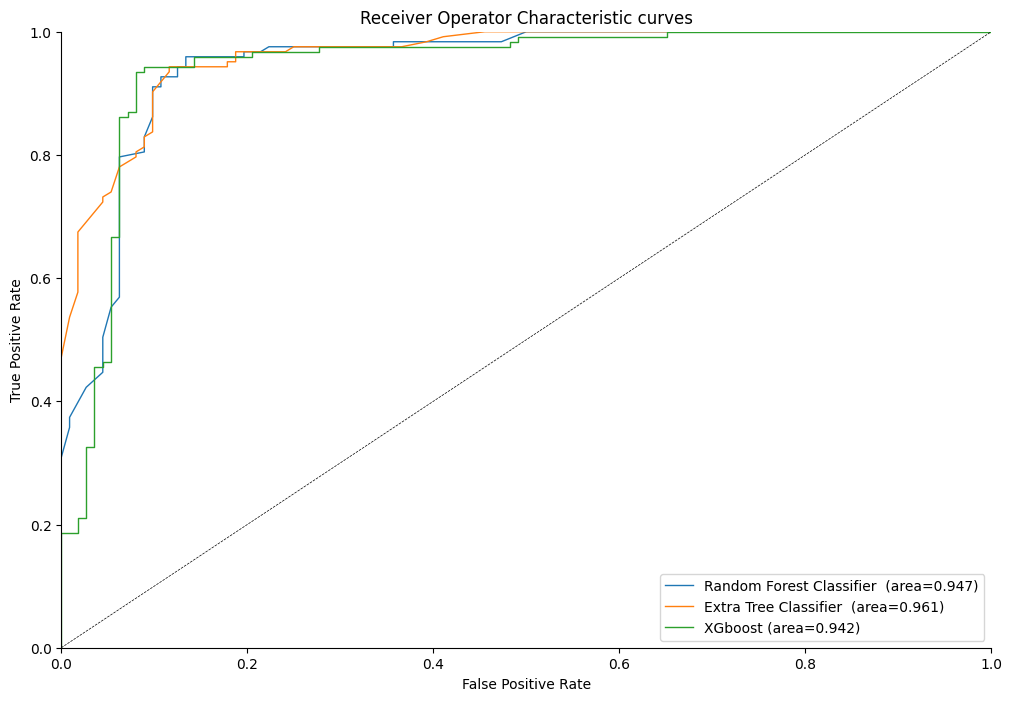

In [57]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,et_100.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

As we can see highest average area under the curve (AUC) of 0.961 is attained by Extra Tree Classifier

### Precision Recall curve

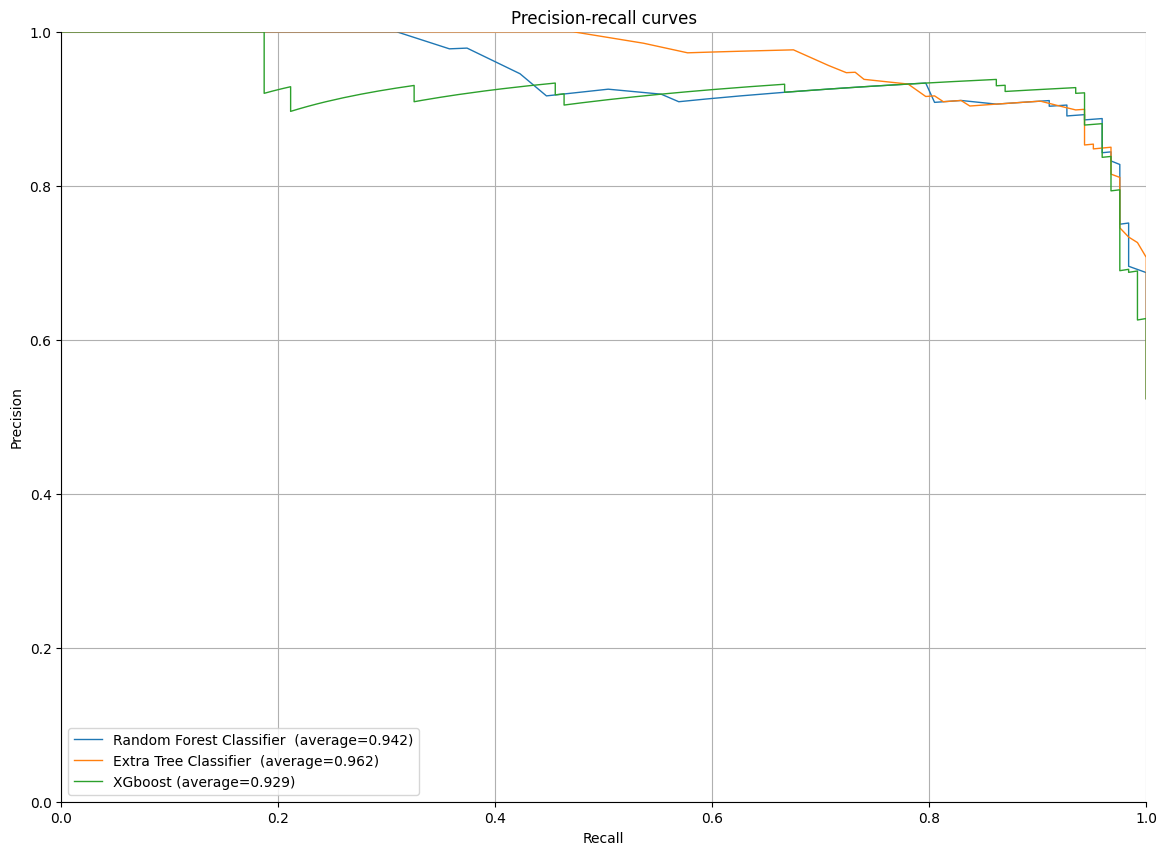

In [58]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
precision_recall_plot(y_test,et_100.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
precision_recall_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

## 11. Feature Selection

In [59]:
num_feats=11

def cor_selector(X, y,num_feats):
    print(f'Original length of features: {len(X.columns.tolist())}')
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')
print(cor_feature)

Original length of features: 15
11 selected features
['cholesterol', 'fasting_blood_sugar', 'chest_pain_type_non-anginal pain', 'age', 'sex_male', 'chest_pain_type_atypical angina', 'st_depression', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_slope_flat', 'st_slope_upsloping']


In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
print(chi_feature)

11 selected features
['age', 'fasting_blood_sugar', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'sex_male', 'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain', 'rest_ecg_normal', 'st_slope_flat', 'st_slope_upsloping']


In [61]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 15 features.
11 selected features


In [62]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2", solver='lbfgs'), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

7 selected features


In [63]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, criterion='gini'), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

8 selected features


In [64]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
# put all selection together
feature_name = X.columns
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support}) # 'LightGBM':embeded_lgb_support
table = feature_selection_df[['Pearson', 'Chi-2', 'RFE', 'Logistics', 'Random Forest']]
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(table, axis=1)
# display the top 11
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

In [ ]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['target','resting_blood_pressure','sex_male','chest_pain_type_non-anginal pain','chest_pain_type_atypical angina'],axis=1)
y = dt['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

In [ ]:
X_test[['age','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

In [ ]:
import xgboost as xgb
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

### Soft voting

In [ ]:
import xgboost as xgb
clf1=RandomForestClassifier(criterion='entropy',n_estimators=100)

clf2=DecisionTreeClassifier()
clf3=xgb.XGBClassifier(n_estimators= 1000)
clf4=ExtraTreesClassifier(n_estimators= 500)

clf5=GradientBoostingClassifier(n_estimators=100,max_features='sqrt')


eclf1 = VotingClassifier(estimators=[('rfe', clf1), ('decc', clf2), ('xgb', clf3),('ET',clf4),('gb',clf5),], 
                         voting='soft', weights=[4,1,2,3,1])
eclf1.fit(X_train,y_train)
y_pred_sv =eclf1.predict(X_test)

## 12 Model Evaluation

In [ ]:
CM=confusion_matrix(y_test,y_pred_sv)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print(TN, FN, TP, FP)
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_sv)
acc= accuracy_score(y_test, y_pred_sv)
roc=roc_auc_score(y_test, y_pred_sv)
prec = precision_score(y_test, y_pred_sv)
rec = recall_score(y_test, y_pred_sv)
f1 = f1_score(y_test, y_pred_sv)

mathew = matthews_corrcoef(y_test, y_pred_sv)
model_results =pd.DataFrame([['Soft Voting',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [ ]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

In [ ]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
et_1000 = ExtraTreesClassifier(n_estimators= 1000)
et_1000.fit(X_train,y_train)
y_pred_et1000 = et_1000.predict(X_test)

In [ ]:
xgb = xgb.XGBClassifier(n_estimators= 1000)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

In [ ]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

In [ ]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

In [ ]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

In [ ]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

In [ ]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

In [ ]:
data = {
             'Random Forest Entropy': y_pred_rfe, 
                'MLP2': y_pred_mlp, 
                'KNN2': y_pred_knn, 
                'EXtra tree classifier': y_pred_et1000,
                'XGB2': y_pred_xgb, 
                'SVC2': y_pred_svc, 
                'SGD2': y_pred_sgd,
                'Adaboost': y_pred_ada, 
                'CART': y_pred_decc, 
                'GBM': y_pred_gbm }

models = pd.DataFrame(data) 
all_res = []
all_res.append(model_results)

for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    all_res.append(results)
    # model_results = model_results.append(results, ignore_index = True)
    
model_results = pd.concat(all_res, ignore_index = True)
model_results

In [ ]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,eclf1.predict_proba(X_test),label='Soft Voting Classifier ',l='-')
roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,et_1000.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

In [ ]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))
precision_recall_plot(y_test,eclf1.predict_proba(X_test),label='Soft voting classifier ',l='-')
precision_recall_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
precision_recall_plot(y_test,et_1000.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
precision_recall_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

### Feature Importance

In [ ]:
feat_importances = pd.Series(rf_ent.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

## 13. Conclusion

- As we have seen, stacked ensemble of power machine learning algorithms resulted in higher performance than any individual machine learning model.
- We have also interpreted second best performing algo i.e., random forest algorithm
- The top 5 most contribution features are:

1. Max heart Rate achieved
2. Cholestrol
3. st_depression
4. Age
5. st_slope_upsloping